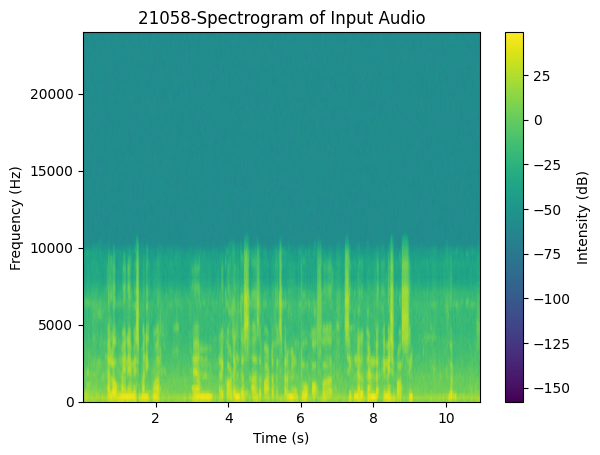

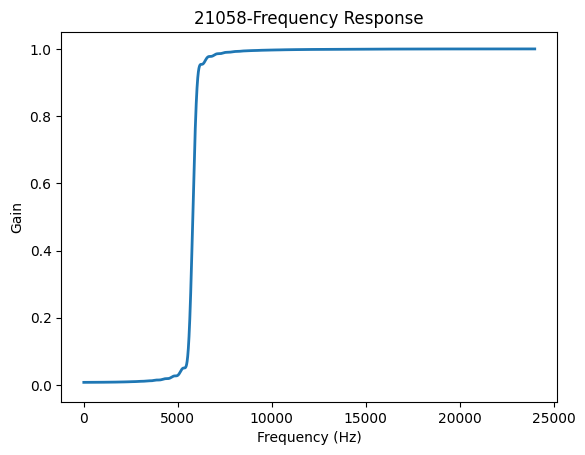

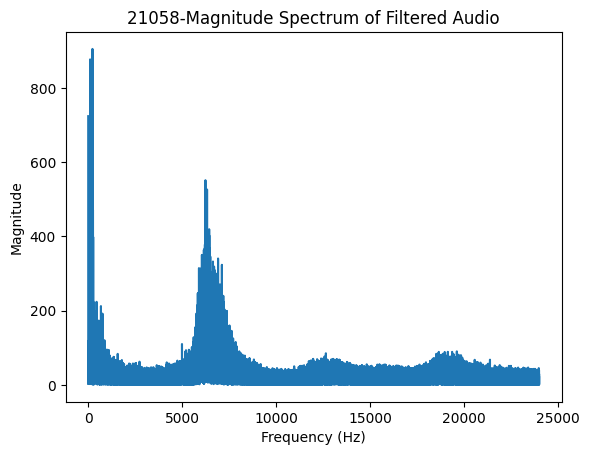

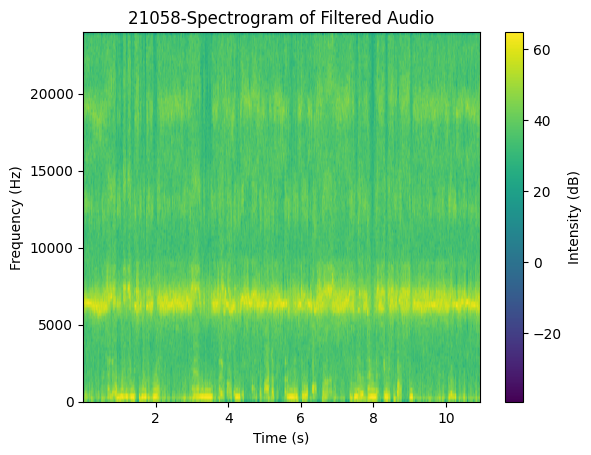

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
from scipy.io import wavfile
from scipy import signal
import soundfile as sf

dir1 = os.getcwd()
filename1 = r"C:\Users\vmani\Downloads\aud.wav"  # Replace with the filename of your input audio file
fullfilename = os.path.join(dir1, filename1)

from scipy.io import wavfile
samplerate, data = wavfile.read(fullfilename)

# Plot the spectrogram of the input audio
plt.specgram(data, Fs=samplerate)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Intensity (dB)')
plt.title('21058-Spectrogram of Input Audio')
plt.show()

nc = 209
fc1 = 5800
fc = fc1 / (samplerate * 0.5)
a = signal.firwin(numtaps=nc, cutoff=fc, window="bartlett", pass_zero='highpass')
output = signal.lfilter(a, 1.0, data)

filename2 = r"C:\Users\vmani\Downloads\out.wav"  # Replace with the filename to save the filtered audio
fullfilename2 = os.path.join(dir1, filename2)

sf.write(fullfilename2, output, samplerate)

samplerate, data1 = wavfile.read(fullfilename2)
n1 = len(data1)
w1 = np.fft.rfft(data1)
w_mag1 = np.abs(w1) / n1
freq = np.fft.rfftfreq(data1.size, d=1.0 / samplerate)

# Frequency response
nyq_rate = samplerate * 0.5
w, h = signal.freqz(a, worN=8000)
plt.plot((w / np.pi) * nyq_rate, np.absolute(h), linewidth=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.title('21058-Frequency Response')
plt.ylim(-0.05, 1.05)
plt.show()

# Plot the magnitude spectrum of the filtered audio
plt.plot(freq, w_mag1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('21058-Magnitude Spectrum of Filtered Audio')
plt.show()

# Plot the spectrogram of the filtered audio
plt.specgram(data1, Fs=samplerate)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Intensity (dB)')
plt.title('21058-Spectrogram of Filtered Audio')
plt.show()